In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="times",style="ticks",font_scale=1.6)
plt.rcParams['text.usetex'] = True
from matplotlib.patches import Rectangle
import numpy as np
from itertools import groupby
from matplotlib.colors import LogNorm

In [45]:
#    1-  6 S6     field        OGLE-IV subfield name
#    8- 15 F8.4   glon         Galactic longitude (deg)
#   17- 24 F8.4   glat         Galactic latitude (deg)
#   26- 29 F4.2   tau          Optical depth (10^{-6})
#   31- 34 F4.2   tau_err      Uncertainty of tau (10^{-6})
#   36- 39 F4.1   gam          Event rate per star (10^{-6} per year)
#   41- 44 F4.1   gam_err      Uncertainty of gam (10^{-6} per year)
#   46- 50 F5.1   gam_deg2     Event rate per unit area (per year per deg^2)
#   52- 55 F4.1   gam_deg2_err Uncertainty of gam_deg2 (per year per deg^2)
#   57- 60 F4.1   t_E_mean     Mean Einstein timescale (d)
#   62- 65 F4.1   t_E_mean_err Uncertainty of t_E_mean (d)
#   67- 69 I3     N_events     Number of events
#   71- 75 F5.2   N_stars  	   Number of sources (10^6)
O4_ER = pd.read_csv("./astrouw.edu.pl_ogle_ogle4_microlensing_maps_table7.dat.txt",
                    comment="#",delim_whitespace=True,header=None,
                    names=["field","glon","glat","tau","tau_err","gam","gam_err",
                           "gam_deg2","gam_deg2_err","tE_mean","tE_mean_err","N_event","N_stars"])
#    1-  9 S9     field    OGLE-IV subfield name
#   11- 17 F7.3   RA       Right ascension (J2000) (deg)
#   19- 25 F7.3   Dec      Declination (J2000) (deg)
#   27- 33 F7.3   glon     Galactic longitude (deg)
#   35- 41 F7.3   glat     Galactic latitude (deg)
#   43- 47 F5.1   sigma18  Star surface density in the range 14 < I < 18
#                          (per arcmin^2)
#   49- 54 F6.1   sigma21  Star surface density in the range 14 < I < 21
#                          (per arcmin^2)
#   56- 60 I5     N18      Number of stars in the range 14 < I < 18
#   62- 67 I6     N21      Number of stars in the range 14 < I < 21
O4_SD = pd.read_csv("./astrouw.edu.pl_ogle_ogle4_microlensing_maps_table5.dat.txt",
                    comment="#",delim_whitespace=True,header=None,
                    names=["field","ra","dec","glon","glat","sigma18","sigma21","N18","N21"])

In [46]:
d = pd.read_csv("./PRIME_GB_FIELD_LB.dat",header=None,delim_whitespace=True)
num = d[0]
gl  = d[1]
gb = d[2]
D_gap = 440 # gap between chips [pixel]
D_gap_as = D_gap*0.5 # gap between chips [as]
side = (4096*2+D_gap)*0.5/3600 # [as]

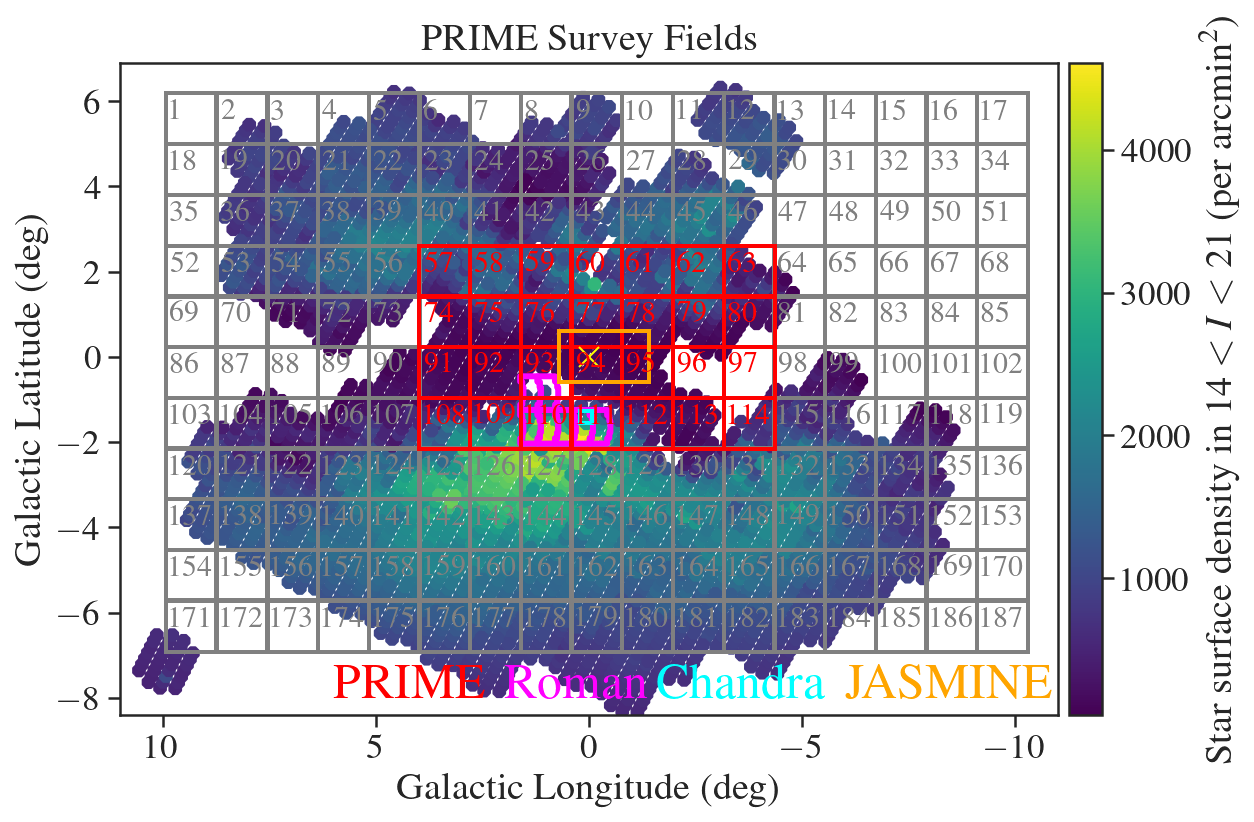

In [93]:
roman=1
chandra=1
jasmine=1
ext_AH=0

fig,ax=plt.subplots(figsize=(10,6))
i=1
for l,b in zip(gl,gb):
    color="gray"
    zorder=0
    if ((56<i) and (i<64)) or ((73<i) and (i<81)) \
    or ((90<i) and (i<98)) or ((107<i) and (i<115)):
        color="red"
        zorder=1
        lw=3
    plt.text(l+0.5,b,i,c=color,size=15)
    x = l-side*0.5
    y = b-side*0.5
    ax.add_patch(Rectangle((x,y),side,side,color="None",ec=color,lw=2,zorder=zorder))
    i+=1

if roman:
    layout='layout_7f_3'
    fields = []
    with open('%s.outline.lbad' % (layout)) as fp:
        for k, g in groupby(fp, lambda x: x.startswith(' ')):
            if not k:
                fields.append(np.array([[float(x) for x in d.split()] for d in g if len(d.strip())]))
    roman_x=-2.2
    for f in fields:
        ax.plot(f[:,1],f[:,2],c="magenta",lw=3,zorder=0)
if chandra:
    l = 0.08;
    b = -1.42;
    side_half = 8.4/60;
    ax.add_patch(Rectangle((l-side_half,b-side_half),side_half*2,side_half*2,color="None",ec="cyan",lw=2,zorder=1))
if jasmine:
    x = -1.4
    y = -0.6
    ax.add_patch(Rectangle((x,y),2.1,1.2,color="None",ec="orange",lw=2,zorder=1))
    
if ext_AH:
    A_K = np.loadtxt('GonzalezExtinction2.txt') #|l|<=5, |b|<=5, 2 arcmin spacing
    nx = np.unique(A_K[:,0]).shape[0]
    ny = np.unique(A_K[:,1]).shape[0]
    xmin = A_K[:,0].min()
    ymin = A_K[:,1].min()
    xmax = A_K[:,0].max()
    ymax = A_K[:,1].max()
    cbmin=0
    cbmax=4
    #Convert A_K to A_H then reshape array for implot (ugh!)
    A_H = 1.559322 * A_K[:,5].reshape((nx,ny)).T
    extmap = ax.imshow(A_H,extent=(xmin,xmax,ymin,ymax),interpolation='nearest',
                       cmap='Blues',origin='lower',vmin=cbmin,vmax=cbmax,zorder=-1)

sc = plt.scatter(O4_SD.glon,O4_SD.glat,c=O4_SD.sigma21,s=40,
            cmap="viridis",marker="8",zorder=-1)
cb = plt.colorbar(sc,ax=ax,pad=0.01)
cb.set_label("Star surface density in $14 < I < 21$ (per arcmin$^2$)")
ax.set_xlabel("Galactic Longitude (deg)")
ax.set_ylabel("Galactic Latitude (deg)")
ax.set_title("PRIME Survey Fields")
ax.plot(0,0,"x",ms=10,lw=10,color="yellow")
plt.axis("equal")
ax.axis([-11,11,-8,6.5])
ax.invert_xaxis()
ax.text(+6,-8,"PRIME",c="red",fontsize=25)
ax.text(+2,-8,"Roman",c="magenta",fontsize=25)
ax.text(-1.6,-8,"Chandra",c="cyan",fontsize=25)
ax.text(-6,-8,"JASMINE",c="orange",fontsize=25)
plt.show()